In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('/Users/arslanaliawan/Desktop/scripts/BlackFriday/BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.shape

(537577, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [6]:
data.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [8]:
data.fillna(value=0,inplace=True)
data["Product_Category_2"] = data['Product_Category_2'].astype(int)
data['Product_Category_3'] = data['Product_Category_3'].astype(int)

print('Product_Category_2', data['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', data['Product_Category_3'].unique())



Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


In [9]:
result1 = int(data['Product_Category_2'].mean())
result2 = int(data['Product_Category_3'].mean())

In [10]:
print(result1)
print(result2)

6
3


In [11]:
#we can also replace them with their mean 
# data['Product_Category_2'] =data['Product_Category_2'].replace(['0'],'6')
# data['Product_Category_3'] =data['Product_Category_3'].replace(['0'],'3')


In [12]:
data.drop(columns =['User_ID','Product_ID'],inplace = True)
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


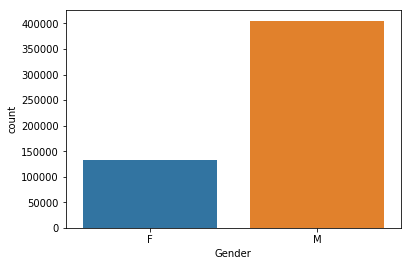

In [13]:
sns.countplot(data['Gender'])

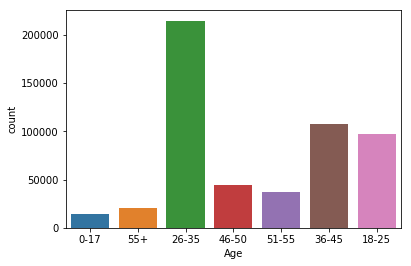

In [14]:
sns.countplot(data['Age'])

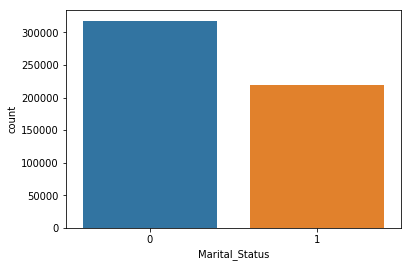

In [15]:
sns.countplot(data['Marital_Status'])

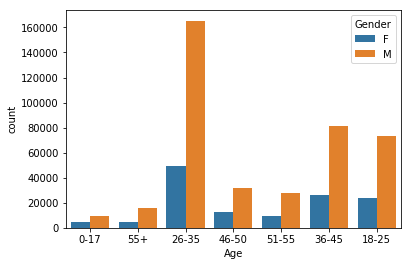

In [16]:
# sns.countplot(data['Gender'],hue = data['Age'])
sns.countplot(data['Age'],hue=data['Gender'])



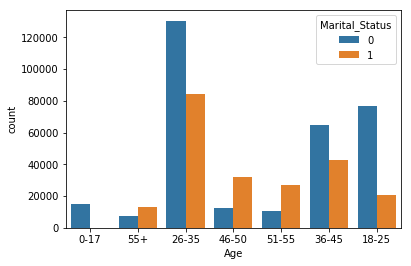

In [21]:
sns.countplot(data['Age'],hue=data['Marital_Status'])



In [25]:
data['combined_G_M']= data.apply(lambda x:'%s_%s' %(x['Gender'],x['Marital_Status']),axis =1)
print(data['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


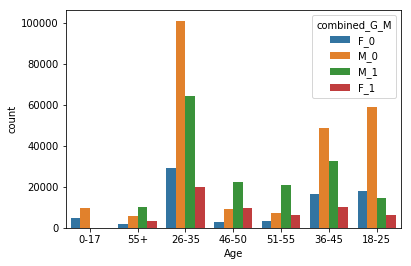

In [26]:
sns.countplot(data['Age'],hue = data['combined_G_M'])